# Task 1B: Fruit classification with a CNN

This notebook will serve as implementation of the API that you have created in your "Code" folder. You will write functions in the "py" files and use them here.

We will be using "Fruits" dataset present in PyTorch and train a convolutional neural network (CNN) to classify digits.


## What is expected from this notebook?

This notebook should be used to present your work. You should explain wherever necessary (but also not too much) about what you did and why you did it. You should explain things like hyper parameter settings (even if it was provided before hand to you by us), training performance and testing performance of the model. You should reason why your model is working fine and not overfitting.

Since numbers don't are an argot, you should also use visualizations wherever possible. You can visualize things like **loss curve**, show **confusion matrix** and since this is a CNN you can also consider **advance techniques like gradcam**, etc. 

You can also use techniques that allow for faster training, assuage problems involving vanishing and exploding gradients. 

Finally, you can show some manual verifications by displaying and making predictions on random test examples. 

## Absolutely required items?

1. First of all, import the libraries and the dataset. Divide the dataset into test and train.
2. Next, show dataset samples and distribution of different type of data. For example, in case of "Fruits Dataset" you can show some random images and their labels. Also, show distribution of each class of images.
3. Next, perform required transformations (also **data augmentation**) on "Fruits dataset" (normalization, resizing, grayscaling, if required, etc.) using torchvision transforms.
4. Create required dataloaders with PyTorch and use the module dataset we created to load data in mini-batches.
5. Train the model, show loss and accuracy at each step of operation.
6. Plot the **loss curve for both train and validation phase**.
7. Pick some manual random images (probably 7-10) from test dataset and predict their values showing **expected and actual result**. 

**NOTE: ** 
1. You may or may not choose to delete these instruction cells after completion of the notebook.
2. Keep the outputs of the cells.

In [66]:
import os
import re
import torch
import csv
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.utils import shuffle
from PIL import Image
from utils import model

In [67]:
from utils import dataset
# import other required libraries here

In [68]:
# loading dataframes using dataset module 
df, df_train, df_test = dataset.create_and_load_meta_csv_df(dataset_path='../Data/fruits/', destination_path='../Data/fruits/', randomize=True, split=0.8)

In [69]:
# using dataframes, pytorch and torchvision to transform data. Also, use dataloaders for batching, shuffling, etc.  
data_transforms = {
    'train': transforms.Compose([transforms.ToTensor()
        # add transforms here
    ]),
    'val': transforms.Compose([transforms.ToTensor()
        # add transforms here
    ]),
}

image_datasets = {'train': dataset.ImageDataset(df_train, transform=data_transforms['train']), 
                  'val': dataset.ImageDataset(df_test, transform=data_transforms['val'])}

#dataloaders = # make data loaders

In [70]:

train_dataset = dataset.ImageDataset(df_train,transform=transforms.ToTensor())
test_dataset = dataset.ImageDataset(df_test, transform=transforms.ToTensor())

In [71]:
expor_csv = df_train.to_csv(r'C:\\Users\\Attarde\\Desktop\\Eyantra 2018\\Task 1\\Task 1B\\Data\\traineddata.csv',header=True,index=True)
export_csv = df_test.to_csv(r'C:\Users\\Attarde\\Desktop\\Eyantra 2018\\Task 1\\Task 1B\\Data\\testdata.csv',header=True,index=True)

In [96]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=4,
                                           shuffle=True)

In [99]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([4, 3, 100, 100])

<Figure size 432x288 with 0 Axes>

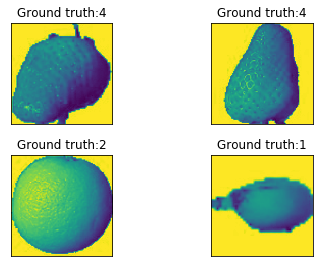

In [100]:
import matplotlib.pyplot as plt
fig= plt.Figure();
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0])
    plt.title("Ground truth:{}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [84]:

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=4,
                                           shuffle=True)

In [85]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [86]:
net = model.FNet(num_classes).to(device)

In [87]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

Epoch [1/5], Step [100/489], Loss: 0.0000
Epoch [1/5], Step [200/489], Loss: 0.0000
Epoch [1/5], Step [300/489], Loss: 0.0000
Epoch [1/5], Step [400/489], Loss: 0.0000


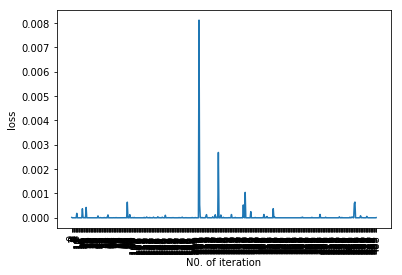

Epoch [2/5], Step [100/489], Loss: 0.0000
Epoch [2/5], Step [200/489], Loss: 0.0000
Epoch [2/5], Step [300/489], Loss: 0.0001
Epoch [2/5], Step [400/489], Loss: 0.0000


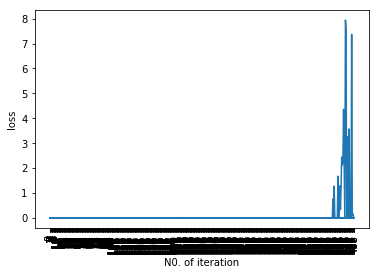

Epoch [3/5], Step [100/489], Loss: 0.0000
Epoch [3/5], Step [200/489], Loss: 0.0000
Epoch [3/5], Step [300/489], Loss: 0.0000
Epoch [3/5], Step [400/489], Loss: 0.0000


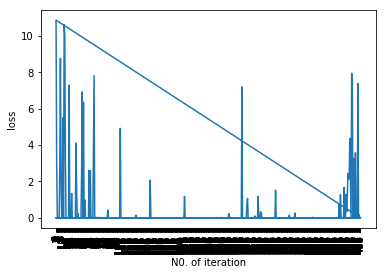

Epoch [4/5], Step [100/489], Loss: 0.0000
Epoch [4/5], Step [200/489], Loss: 0.0000
Epoch [4/5], Step [300/489], Loss: 0.0000
Epoch [4/5], Step [400/489], Loss: 0.0000


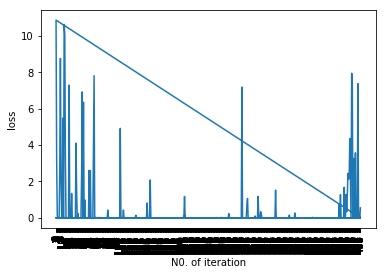

Epoch [5/5], Step [100/489], Loss: 0.0000
Epoch [5/5], Step [200/489], Loss: 0.0000
Epoch [5/5], Step [300/489], Loss: 0.0000
Epoch [5/5], Step [400/489], Loss: 0.0000


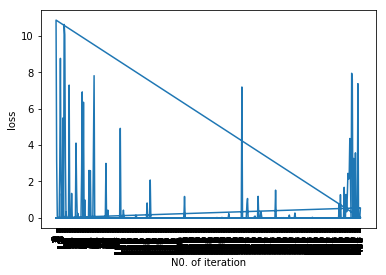

FNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=20000, out_features=10, bias=True)
)

In [94]:
import matplotlib.pyplot as plt

# Train the model
total_step = len(train_loader)
cost=[]
index=[]
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = net(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cost.append(loss)
        index.append(i)
        
        if (i+1) % 100 == 0:
            
            
            
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    plt.plot(index,cost)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("N0. of iteration")
    plt.ylabel("loss")
    plt.show()

# Test the model
net.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)


# Save the model checkpoint
#torch.save(model.state_dict(), 'model.ckpt')

In [78]:
# do rest of the things as mentioned in the above points

In [95]:
with torch.no_grad():
    correct = 0
    total = 0
    cnt=0
    classes = ['Apple', 'Banana','Orange','Pineapple','Strawberry']
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        tmp = []
        for i in labels:
            tmp.append(i.item())
        cntr = 0
        for i in predicted:
            print("actual: ",classes[i.item()],"\t Predicted: ",classes[tmp[cntr]])
            if i.item() == tmp[cntr]:
                cnt+=1
            cntr+=1
        total+=4
        
    

    print('Test Accuracy of the model on the test images: {} %'.format(100 * cnt / total))

actual:  Orange 	 Predicted:  Orange
actual:  Orange 	 Predicted:  Orange
actual:  Apple 	 Predicted:  Apple
actual:  Orange 	 Predicted:  Orange
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Apple 	 Predicted:  Apple
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Orange 	 Predicted:  Orange
actual:  Apple 	 Predicted:  Apple
actual:  Banana 	 Predicted:  Banana
actual:  Orange 	 Predicted:  Orange
actual:  Apple 	 Predicted:  Apple
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Apple 	 Predicted:  Apple
actual:  Apple 	 Predicted:  Apple
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Orange 	 Predicted:  Orange
actual:  Banana 	 Predicted:  Banana
actual:  Banana 	 Predicted:  Banana
actual:  Apple 	 Predicted:  Apple
actual:  Banana 	 Predicted:  Banana
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Strawberry 	 Predict

actual:  Banana 	 Predicted:  Banana
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Apple 	 Predicted:  Apple
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Apple 	 Predicted:  Apple
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Banana 	 Predicted:  Banana
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Apple 	 Predicted:  Apple
actual:  Orange 	 Predicted:  Orange
actual:  Apple 	 Predicted:  Apple
actual:  Orange 	 Predicted:  Orange
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Orange 	 Predicted:  Orange
actual:  Orange 	 Predicted:  Orange
actual:  Apple 	 Predicted:  Apple
actual:  Orange 	 Predicted:  Orange
actual:  Banana 	 Predicted:  Banana
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Apple 	 Predicted:  Apple
actual:  Ap

actual:  Pineapple 	 Predicted:  Pineapple
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Apple 	 Predicted:  Apple
actual:  Banana 	 Predicted:  Banana
actual:  Banana 	 Predicted:  Banana
actual:  Orange 	 Predicted:  Orange
actual:  Apple 	 Predicted:  Apple
actual:  Apple 	 Predicted:  Apple
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Apple 	 Predicted:  Apple
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Strawberry 	 Predicted:  Strawberry
actual:  Orange 	 Predicted:  Orange
actual:  Orange 	 Predicted:  Orange
actual:  Banana 	 Predicted:  Banana
actual:  Orange 	 Predicted:  Orange
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Banana 	 Predicted:  Banana
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Banana 	 Predicted:  Banana
actual:  Banana 	 Predicted:  Banana
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Pineapple 	 Predicted:  Pineapple
actual:  Banana 	 Predicted:  Banana
actual:  Apple 